# Tutorial notebook for `peak_finder`

In [6]:
import numpy as np
from scipy.signal import find_peaks, peak_prominences, argrelextrema
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import os
from peak_finder import significant_peaks, plot_peaks

First, let's define file-name variables for the transit-peth data file and the table of molecular features: <br><br>
1. The transit-depth data file should have three columns: wavelength in microns, transit depth & transit-depth error. No column header though!
2. The molecular features table file should have two columns: `Species` & `Wavelength(microns)`. Column header present! See `Table.txt` as an example. 

In [9]:
data_file = 'HD209458b_syn_data.dat'
mol_table_file = 'peak_finder/Table_rev.txt'



`find_peaks` identifies significant 'absorption' features in `data_file` and compares it with the list of  features in `mol_table_file`, and returns all the species that it detects. Let's try that! 

In [10]:
# set the desired SNR threshold for features

snr = 10

# call significant_peaks function to get list of identified molecules and their features

unique_species, all_positions  = significant_peaks(data_file,mol_table_file,snr)


Using the outputs of `significant_peaks`, we can also create a neat plot using the `plot_peaks` function that shows wavelength positions of all identified features and labels them too!

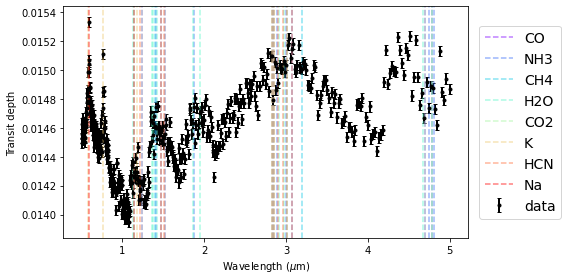

In [11]:
# extract the columns from the transit-depth data file

wav_data = np.loadtxt(data_file, unpack=True,usecols=0)
data    = np.loadtxt(data_file, unpack=True,usecols=1)
err_data = np.loadtxt(data_file, unpack=True,usecols=2)

# create a display plot with data and the idenfitifed features

fig, ax = plot_peaks(unique_species, all_positions, data, wav_data, err_data)
